In [46]:
!pip install openpyxl prophet


     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.6 kB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.2/13.3 MB 3.7 MB/s eta 0:00:04
   - -------------------------------------- 0.3/13.3 MB 5.5 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/13.3 MB 7.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.4/13.3 MB 7.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/13.3 MB 10.6 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/13.3 MB 10.6 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/13.3 MB 10.6 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/13.3 MB 10.6 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/13.3 MB 10.6 MB/s eta 0:00:02



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Shugora\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats

warnings.filterwarnings('ignore')

In [7]:
df = pd.read_excel("output_data.xlsx")
df.head()

,Tanggal,RR
0,2021-01-01,0.8
1,2021-01-02,2.0
2,2021-01-03,3.2
3,2021-01-04,2.4
4,2021-01-05,49.8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  1339 non-null   datetime64[ns]
 1   RR       1339 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.1 KB


In [9]:
df.describe()

,Tanggal,RR
count,1339,1339.000000
mean,2022-11-01 00:00:00,10.131591
min,2021-01-01 00:00:00,0.000000
25%,2021-12-01 12:00:00,0.100000
50%,2022-11-01 00:00:00,3.100000
75%,2023-10-01 12:00:00,14.266667
max,2024-08-31 00:00:00,249.000000
std,NaN,17.354787


In [10]:
df['RR'].isnull().sum()

np.int64(0)

<Axes: >

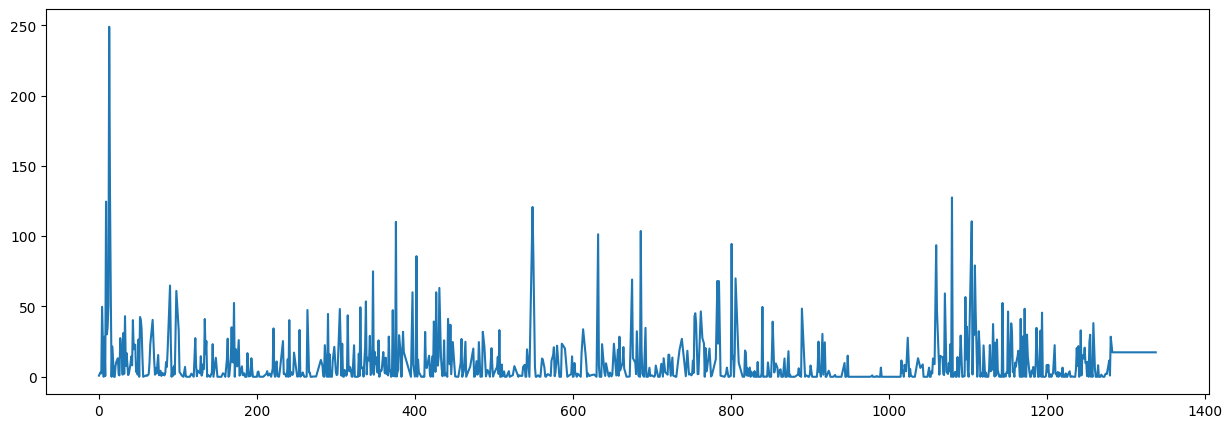

In [11]:
df['RR'].plot(figsize=(15,5))

In [12]:
new_df = pd.DataFrame()
new_df['date'] = df['Tanggal']
new_df['RR'] = df['RR']
new_df.head()

,date,RR
0,2021-01-01,0.8
1,2021-01-02,2.0
2,2021-01-03,3.2
3,2021-01-04,2.4
4,2021-01-05,49.8


In [13]:
print(new_df.duplicated().sum())
new_df.drop_duplicates(subset='date', inplace=True)
new_df.reset_index(drop=True, inplace=True)
new_df.sort_values(by='date')

0


,date,RR
0,2021-01-01,0.8
1,2021-01-02,2.0
2,2021-01-03,3.2
3,2021-01-04,2.4
4,2021-01-05,49.8
...,...,...
1334,2024-08-27,17.4
1335,2024-08-28,17.4
1336,2024-08-29,17.4
1337,2024-08-30,17.4


In [14]:
new_df["zscore_val"] = stats.zscore(new_df['RR'])

threshold = 3
outliers = new_df[(new_df['zscore_val'] > threshold) | (new_df['zscore_val'] < -threshold)]
new_df.loc[outliers.index, 'RR'] = new_df['RR'].median()

new_df.drop(columns=['zscore_val'], inplace=True)

In [15]:
new_df['date'] = pd.to_datetime(new_df['date'])
new_df.set_index('date', inplace=True)

In [16]:
new_df.sort_index(inplace=True)

<Axes: xlabel='date'>

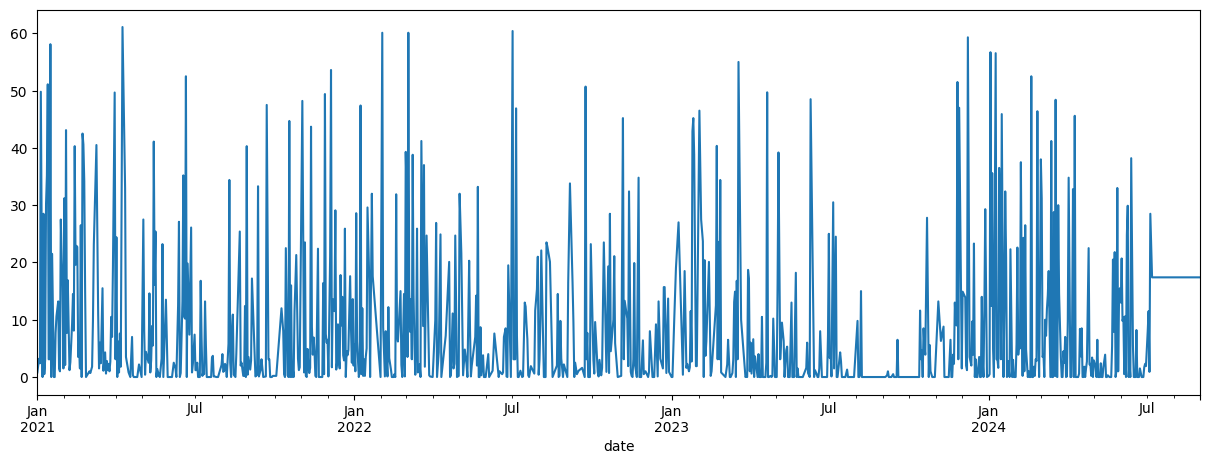

In [17]:
new_df['RR'].plot(figsize=(15,5))

In [18]:
new_df.describe()

,RR
count,1339.000000
mean,8.488598
std,11.802741
min,0.000000
25%,0.100000
50%,3.100000
75%,13.200000
max,61.100000


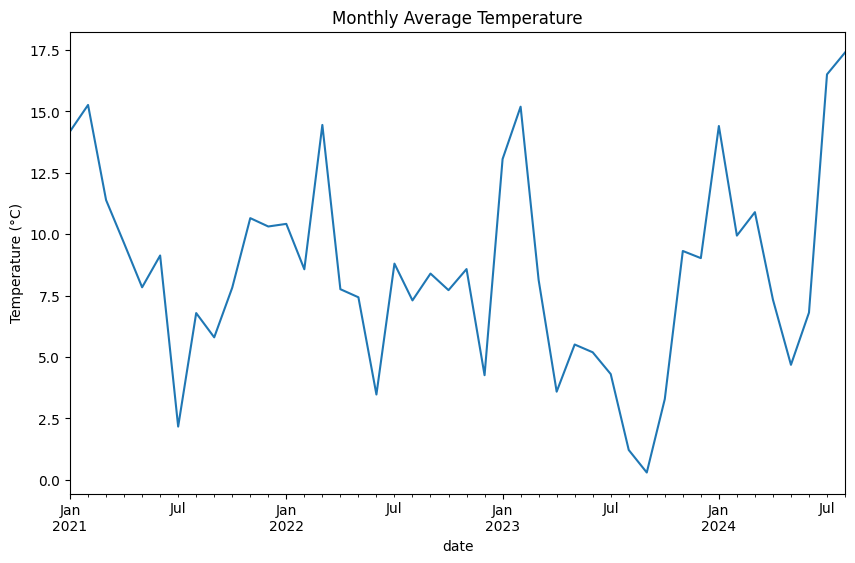

,RR
date,
2021-01,14.187097
2021-02,15.264286
2021-03,11.390323
2021-04,9.628333
2021-05,7.835484


In [19]:
# Menghitung rata-rata suhu bulanan
monthly_avg = new_df['RR'].resample('M').mean()

monthly_df = pd.DataFrame(monthly_avg)
monthly_df.index = monthly_df.index.strftime('%Y-%m')

# Visualisasi rata-rata bulanan
monthly_avg.plot(figsize=(10, 6), title='Monthly Average Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

monthly_df.head()

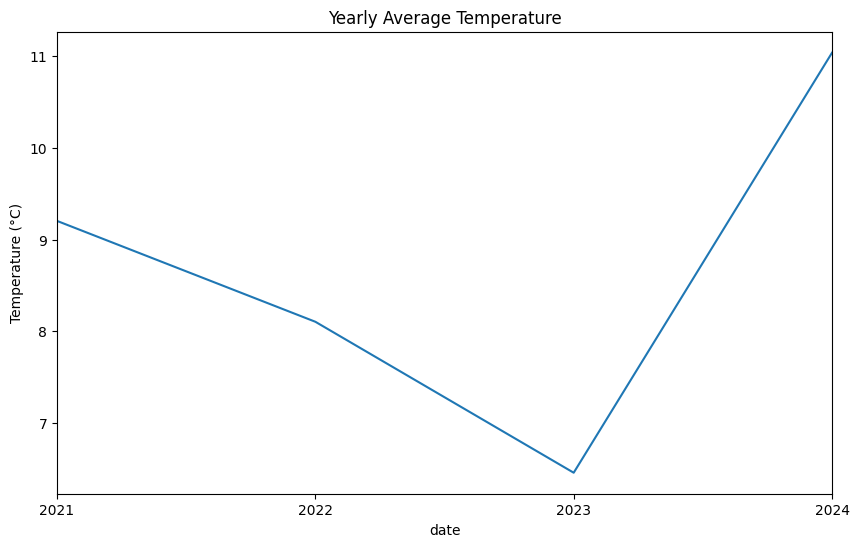

In [20]:
# Menghitung rata-rata suhu tahunan
yearly_avg = new_df['RR'].resample('Y').mean()

# Visualisasi rata-rata tahunan
yearly_avg.plot(figsize=(10, 6), title='Yearly Average Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

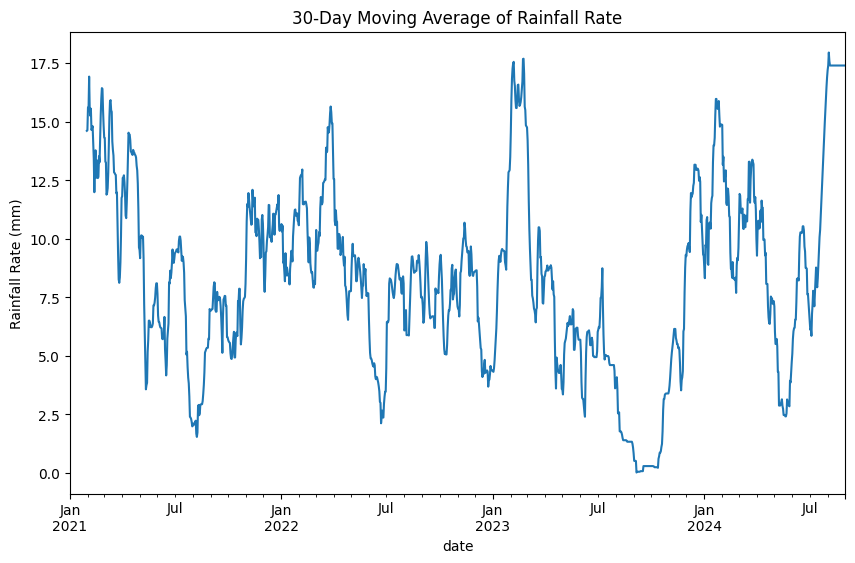

In [21]:
# Moving average dengan window 30 hari
new_df['RR'].rolling(window=30).mean().plot(figsize=(10, 6), title='30-Day Moving Average of Rainfall Rate')
plt.ylabel('Rainfall Rate (mm)')
plt.show()

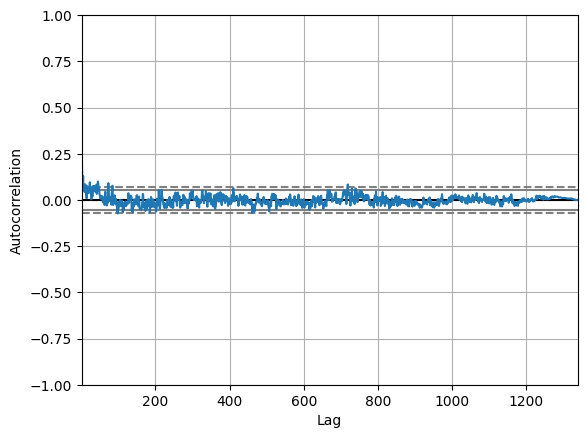

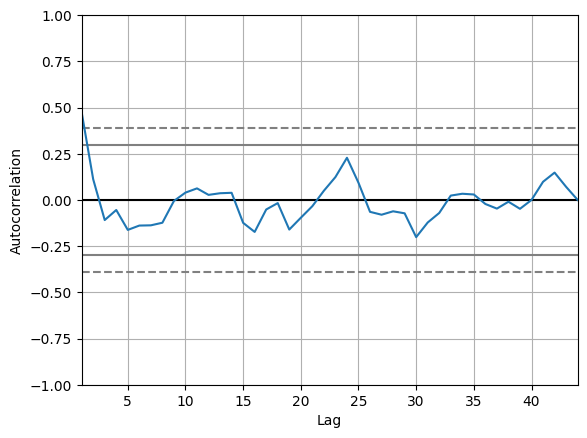

In [22]:
from pandas.plotting import autocorrelation_plot

# Plot autokorelasi
autocorrelation_plot(new_df['RR'])
plt.show()

autocorrelation_plot(monthly_df['RR'])
plt.show()

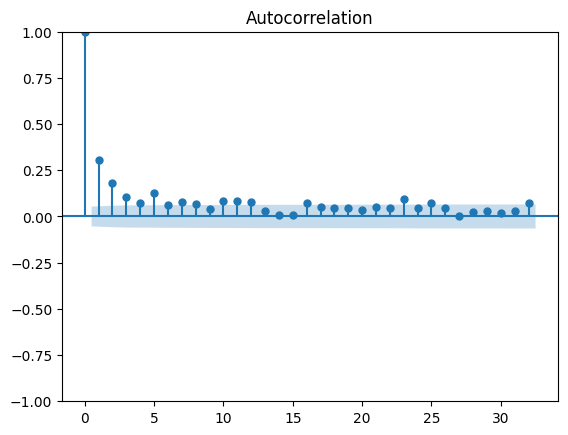

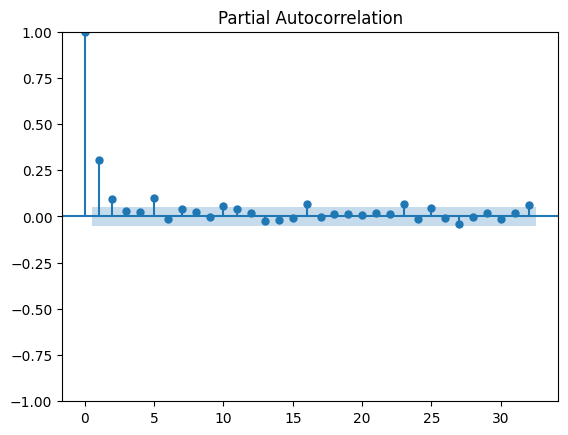

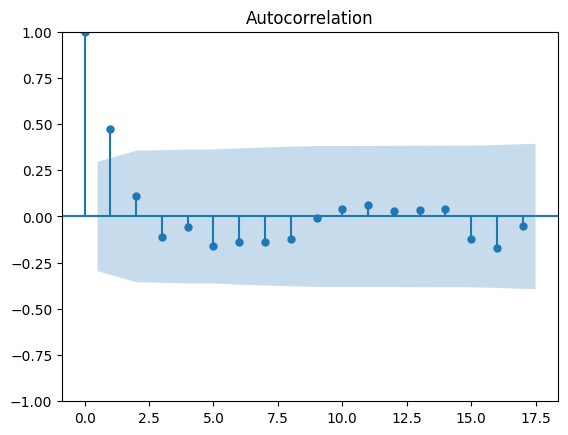

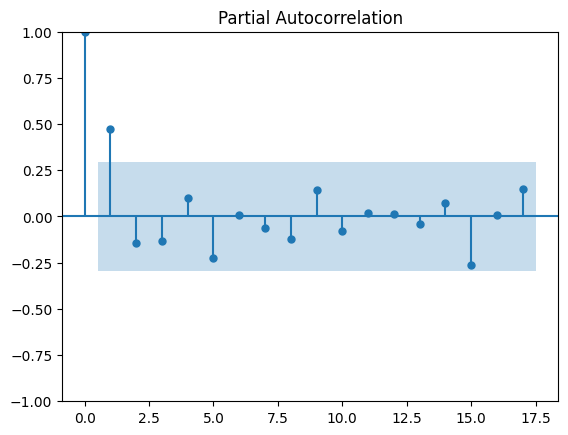

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF dan PACF
plot_acf(new_df['RR'])
plot_pacf(new_df['RR'])
plt.show()

# Plot ACF dan PACF
plot_acf(monthly_df['RR'])
plot_pacf(monthly_df['RR'])
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(df):
    result = adfuller(df, autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used', 'Critical Values']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))

In [25]:
adfuller_test(new_df['RR'])

ADF Test Statistic : -12.433575216829087
p-value : 3.8916366134432507e-23
#Lags Used : 4
Number of Observations Used : 1334
Critical Values : {'1%': np.float64(-3.4352614901385388), '5%': np.float64(-2.863709037790883), '10%': np.float64(-2.5679248018719276)}


In [26]:
adfuller_test(monthly_df['RR'])

ADF Test Statistic : -3.3596572734862087
p-value : 0.012413482723664786
#Lags Used : 0
Number of Observations Used : 43
Critical Values : {'1%': np.float64(-3.5925042342183704), '5%': np.float64(-2.931549768951162), '10%': np.float64(-2.60406594375338)}


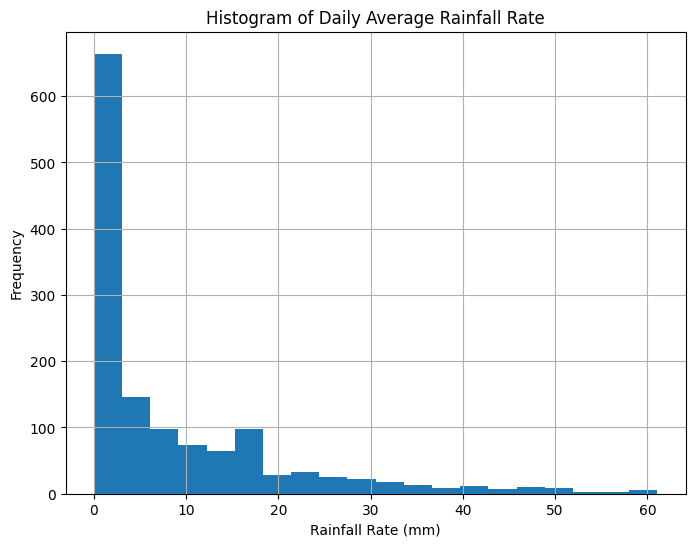

In [27]:
# Histogram dari data RR Daily
new_df['RR'].hist(bins=20, figsize=(8, 6))
plt.title('Histogram of Daily Average Rainfall Rate')
plt.xlabel('Rainfall Rate (mm)')
plt.ylabel('Frequency')
plt.show()

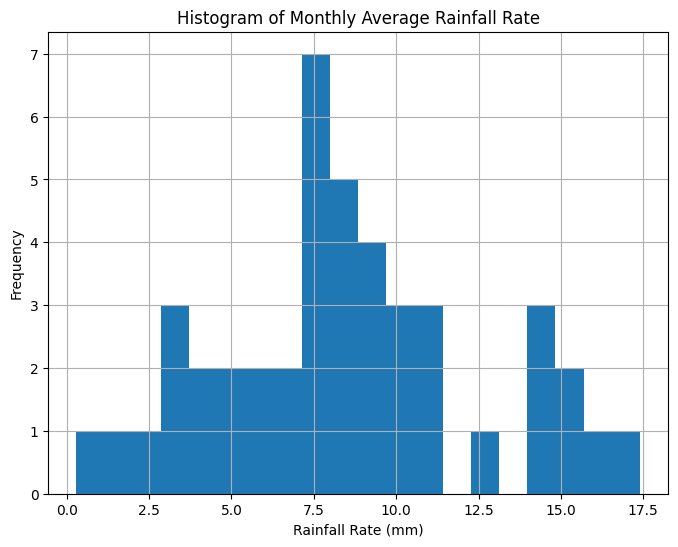

In [28]:
# Histogram dari data RR Monthly
monthly_df['RR'].hist(bins=20, figsize=(8, 6))
plt.title('Histogram of Monthly Average Rainfall Rate')
plt.xlabel('Rainfall Rate (mm)')
plt.ylabel('Frequency')
plt.show()

In [29]:
df_arima = new_df.copy()
df_arima.head()

,RR
date,
2021-01-01,0.8
2021-01-02,2.0
2021-01-03,3.2
2021-01-04,2.4
2021-01-05,49.8


In [30]:
df_arima_monthly = monthly_df.copy()
df_arima_monthly.head()

,RR
date,
2021-01,14.187097
2021-02,15.264286
2021-03,11.390323
2021-04,9.628333
2021-05,7.835484


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'new_df' is your DataFrame with 'Tanggal' as the index and 'RR' as the target
X = new_df.index  # Feature (date)
y = new_df['RR']  # Target (rainfall rate)

# Skenario 1: 80% Train - 20% Test
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.20, shuffle=False)
train_80_df = pd.DataFrame({'date': X_train_80, 'RR': y_train_80})
test_80_df = pd.DataFrame({'date': X_test_80, 'RR': y_test_80})

# Skenario 2: 70% Train - 30% Test
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.30, shuffle=False)
train_70_df = pd.DataFrame({'date': X_train_70, 'RR': y_train_70})
test_70_df = pd.DataFrame({'date': X_test_70, 'RR': y_test_70})

# Skenario 3: 60% Train - 40% Test
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X, y, test_size=0.40, shuffle=False)
train_60_df = pd.DataFrame({'date': X_train_60, 'RR': y_train_60})
test_60_df = pd.DataFrame({'date': X_test_60, 'RR': y_test_60})

# Displaying the DataFrames
print("Train Data (80-20 Split):")
print(train_80_df.head())

print("\nTest Data (80-20 Split):")
print(test_80_df.head())

print("\nTrain Data (70-30 Split):")
print(train_70_df.head())

print("\nTest Data (70-30 Split):")
print(test_70_df.head())

print("\nTrain Data (60-40 Split):")
print(train_60_df.head())

print("\nTest Data (60-40 Split):")
print(test_60_df.head())

Train Data (80-20 Split):
                 date    RR
date                       
2021-01-01 2021-01-01   0.8
2021-01-02 2021-01-02   2.0
2021-01-03 2021-01-03   3.2
2021-01-04 2021-01-04   2.4
2021-01-05 2021-01-05  49.8

Test Data (80-20 Split):
                 date     RR
date                        
2023-12-08 2023-12-08  59.30
2023-12-09 2023-12-09  31.40
2023-12-10 2023-12-10   3.50
2023-12-11 2023-12-11   2.75
2023-12-12 2023-12-12   2.00

Train Data (70-30 Split):
                 date    RR
date                       
2021-01-01 2021-01-01   0.8
2021-01-02 2021-01-02   2.0
2021-01-03 2021-01-03   3.2
2021-01-04 2021-01-04   2.4
2021-01-05 2021-01-05  49.8

Test Data (70-30 Split):
                 date    RR
date                       
2023-07-27 2023-07-27  0.00
2023-07-28 2023-07-28  0.00
2023-07-29 2023-07-29  0.00
2023-07-30 2023-07-30  0.00
2023-07-31 2023-07-31  2.45

Train Data (60-40 Split):
                 date    RR
date                       
2021-01-01 2021-01-01

In [32]:
df_train_arima = train_70_df
df_test_arima = test_70_df

<Axes: xlabel='date'>

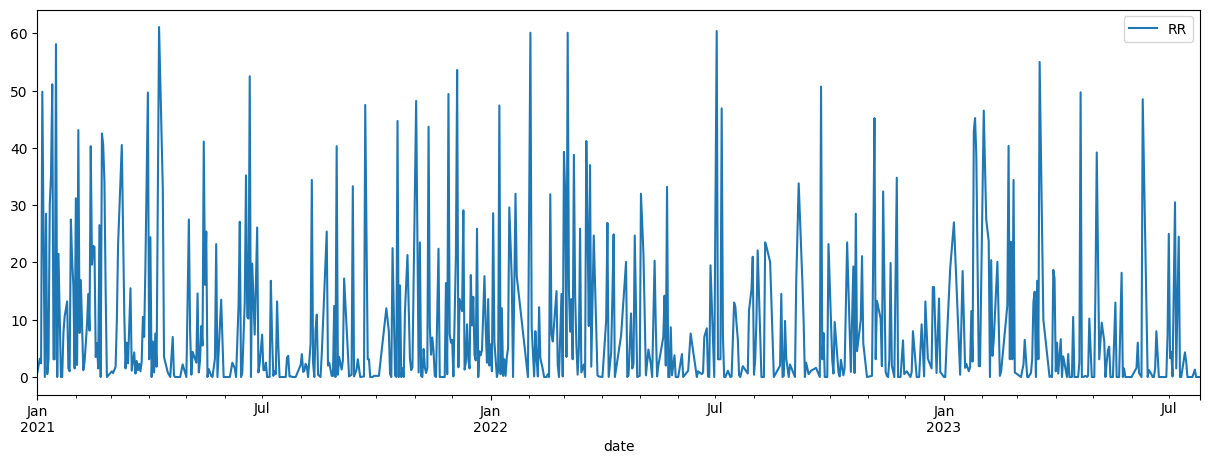

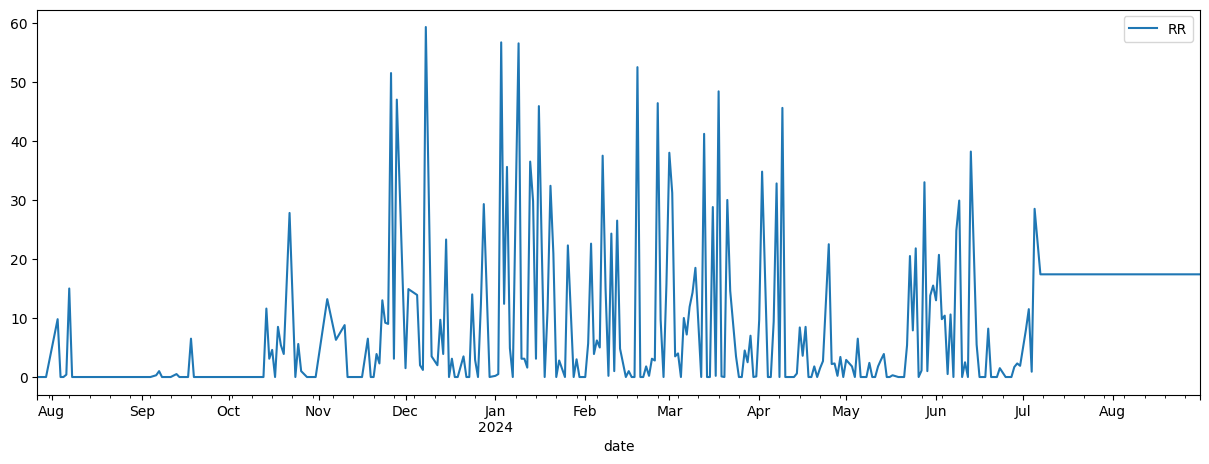

In [33]:
df_train_arima.set_index('date', inplace=True)
df_test_arima.set_index('date', inplace=True)

df_train_arima.plot(figsize=(15,5))
df_test_arima.plot(figsize=(15,5))

In [34]:
adfuller_test(df_train_arima['RR'])

ADF Test Statistic : -16.481438602959017
p-value : 2.2352526168674207e-29
#Lags Used : 1
Number of Observations Used : 935
Critical Values : {'1%': np.float64(-3.437363201927513), '5%': np.float64(-2.864636122077874), '10%': np.float64(-2.5684185607252137)}


In [35]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

# Tentukan range untuk p, d, q
p = range(0, 5)
d = range(0, 1)
q = range(0, 16)

# Kombinasi p, d, q
pdq = list(itertools.product(p, d, q))

# Iterasi untuk mencari model terbaik berdasarkan AIC
best_aic = float("inf")
best_pdq = None

for param in pdq:
    try:
        model = ARIMA(df_train_arima['RR'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print(f'Best ARIMA model: ARIMA{best_pdq} with AIC: {best_aic}')

C:\Users\Shugora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shugora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shugora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shugora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\

Best ARIMA model: ARIMA(4, 0, 2) with AIC: 7203.911865956723


C:\Users\Shugora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train_arima, order = best_pdq)
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Shugora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shugora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shugora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     RR   No. Observations:                  937
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -3593.956
Date:                Thu, 24 Oct 2024   AIC                           7203.912
Time:                        22:02:03   BIC                           7242.653
Sample:                    01-01-2021   HQIC                          7218.683
                         - 07-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4925      0.983      8.637      0.000       6.565      10.420
ar.L1         -1.0306      0.114     -9.057      0.000      -1.254      -0.808
ar.L2         -0.3512      0.094     -3.732      0.0

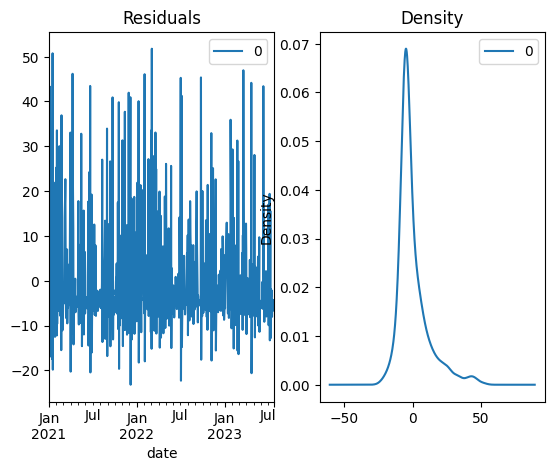

In [37]:
import matplotlib.pyplot as plt
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title = 'Residuals', ax = ax[0])
residuals.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

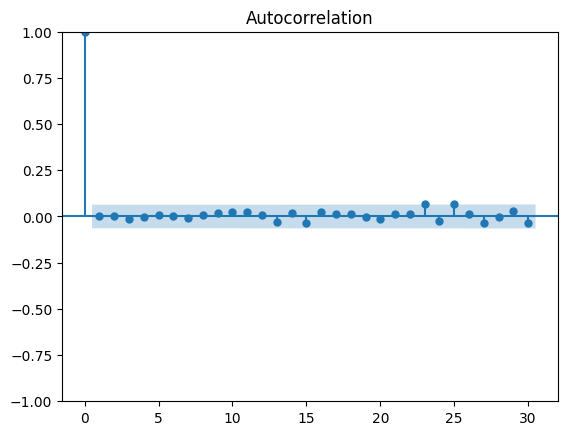

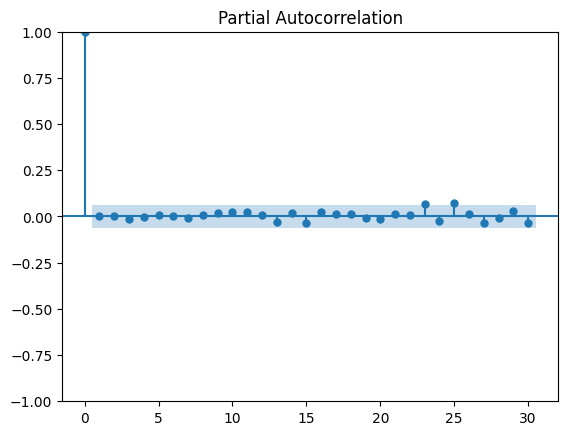

In [38]:
acf_residuals = plot_acf(residuals)
pacf_residuals = plot_pacf(residuals)

In [39]:
forecast_test = model_fit.forecast(len(df_test_arima))

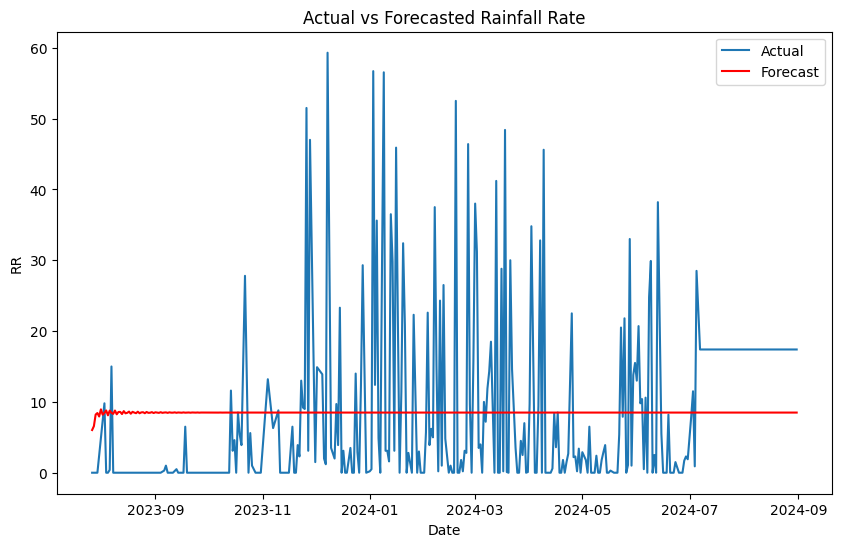

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(df_test_arima.index, df_test_arima['RR'], label='Actual')
plt.plot(df_test_arima.index, forecast_test, label='Forecast', color='red')
plt.title('Actual vs Forecasted Rainfall Rate')
plt.xlabel('Date')
plt.ylabel('RR')
plt.legend()
plt.show()

Prophet

In [44]:
# Prepare data for Prophet without resetting if 'date' already exists
prophet_df = train_80_df[['date', 'RR']]

# Rename columns
prophet_df.columns = ['ds', 'y']


In [49]:
!pip install prophet



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Shugora\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [51]:
from prophet import Prophet  # Use the updated import

# Fit the model
model_prophet = Prophet()
model_prophet.fit(prophet_df)

# Forecast for next 30 days
future = model_prophet.make_future_dataframe(periods=len(test_80_df))
forecast_prophet = model_prophet.predict(future)


Importing plotly failed. Interactive plots will not work.
22:09:13 - cmdstanpy - INFO - Chain [1] start processing
22:09:13 - cmdstanpy - INFO - Chain [1] done processing


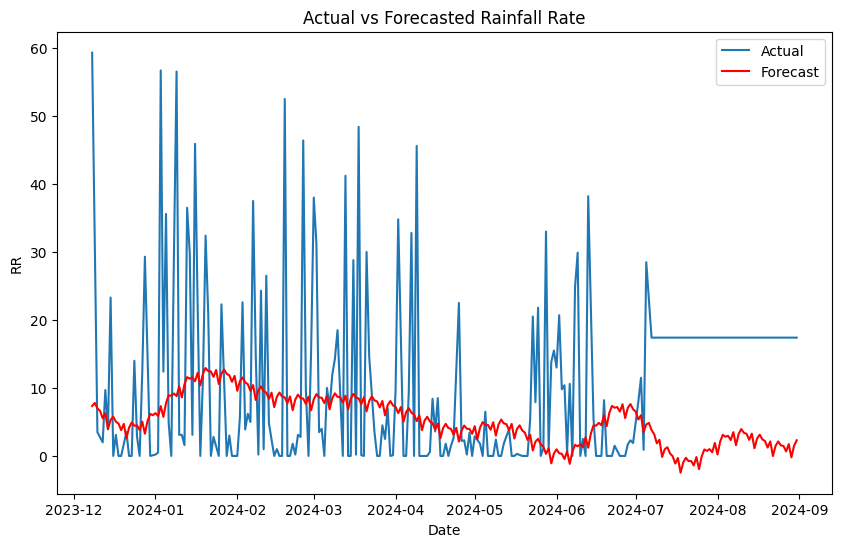

In [53]:
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(test_80_df.index, test_80_df['RR'], label='Actual')

# Plot forecasted data (use 'yhat' for the forecasted values)
plt.plot(test_80_df.index, forecast_prophet['yhat'][-len(test_80_df):], label='Forecast', color='red')

plt.title('Actual vs Forecasted Rainfall Rate')
plt.xlabel('Date')
plt.ylabel('RR')
plt.legend()
plt.show()


## Hybrid Forecast

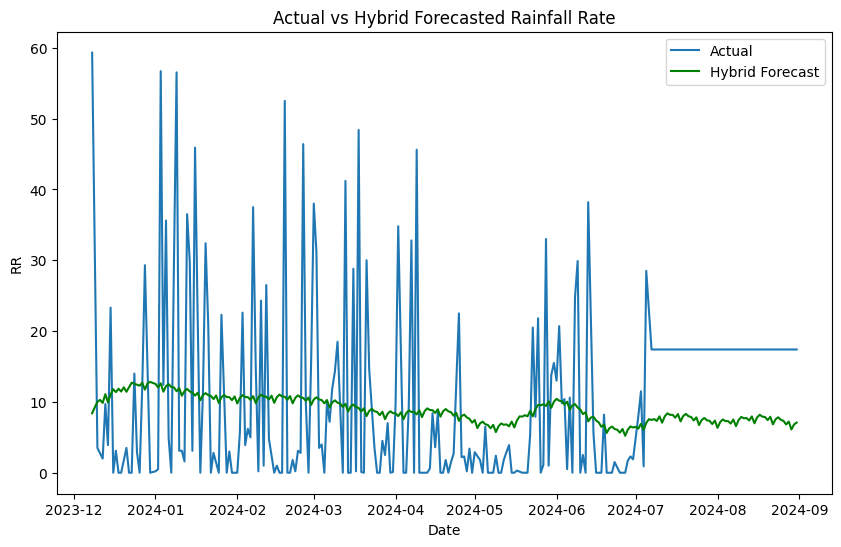

In [55]:
# Trim forecast_test to match the length of test_80_df
forecast_test_trimmed = forecast_test[:len(test_80_df)]

# Create a hybrid prediction by averaging ARIMA and Prophet forecasts for the test set
hybrid_forecast = (forecast_test_trimmed + forecast_prophet['yhat'][:len(test_80_df)].values) / 2

# Plot the hybrid model predictions against actual values
plt.figure(figsize=(10, 6))
plt.plot(test_80_df.index, test_80_df['RR'], label='Actual')
plt.plot(test_80_df.index, hybrid_forecast, label='Hybrid Forecast', color='green')
plt.title('Actual vs Hybrid Forecasted Rainfall Rate')
plt.xlabel('Date')
plt.ylabel('RR')
plt.legend()
plt.show()


## Evaluation of Hybrid Model

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute evaluation metrics for hybrid model
mse_hybrid = mean_squared_error(test_80_df['RR'], hybrid_forecast)
mae_hybrid = mean_absolute_error(test_80_df['RR'], hybrid_forecast)
mape_hybrid = np.mean(np.abs((test_80_df['RR'] - hybrid_forecast) / test_80_df['RR'])) * 100
r2_hybrid = r2_score(test_80_df['RR'], hybrid_forecast)

print(f"Hybrid Model - MSE: {mse_hybrid:.4f}, MAE: {mae_hybrid:.4f}, MAPE: {mape_hybrid:.4f}, R²: {r2_hybrid:.4f}")


Hybrid Model - MSE: 155.0181, MAE: 9.8633, MAPE: inf, R²: -0.0254


## Forecast 1 Year Ahead